Lambda School Data Science

*Unit 2, Sprint 1, Module 3*

---

In [ ]:
# Import Model Building libaries
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.pipeline import make_pipeline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# For running this notebook either locally or in colab
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

# For encoding categorical data
from category_encoders import OneHotEncoder

# Module Project: Ridge Regression

For this project, you'll return to the Tribecca Condo dataset. But this time, you'll look at the _entire_ dataset and try to predict property sale prices.

The [NYC Department of Finance](https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page) has a glossary of property sales terms and NYC Building Class Code Descriptions. The data comes from the [NYC OpenData](https://data.cityofnewyork.us/browse?q=NYC%20calendar%20sales) portal.

## Directions

The tasks for this project are the following:

- **Task 1:** Import `csv` file using `wrangle` function.
- **Task 2:** Conduct exploratory data analysis (EDA), and modify `wrangle` function to engineer two subset your dataset to one-family dwellings whose price is between \\$100,000 and \\$2,000,000.
- **Task 3:** Split data into feature matrix `X` and target vector `y`.
- **Task 4:** Split feature matrix `X` and target vector `y` into training and test sets.
- **Task 5:** Establish the baseline mean absolute error for your dataset.
- **Task 6:** Build and train a `OneHotEncoder`, and transform `X_train` and `X_test`.
- **Task 7:** Build and train a `LinearRegression` model.
- **Task 8:** Build and train a `Ridge` model.
- **Task 9:** Calculate the training and test mean absolute error for your `LinearRegression` model.
- **Task 10:** Calculate the training and test mean absolute error for your `Ridge` model.
- **Task 11:** Create a horizontal bar chart showing the 10 most influencial features for your `Ridge` model. 

**Note**

You should limit yourself to the following libraries for this project:

- `category_encoders`
- `matplotlib`
- `pandas`
- `sklearn`

# I. Wrangle Data

In [ ]:
# Wrangle function to clean Data
def wrangle(filepath):

    # Creating a variable that has all of the desired columns to keep from the original set
    cols = ['BOROUGH','NEIGHBORHOOD','BUILDING CLASS CATEGORY','GROSS SQUARE FEET','YEAR BUILT','SALE PRICE','SALE DATE']

    # Importing the CSV, parsing dates, and setting the index to the Sale Date column
    df = pd.read_csv(filepath, usecols=cols,parse_dates=['SALE DATE'],index_col='SALE DATE')

    # Cleaning the Sale_price column by removing all the unneccary values, then converting it into an int type
    df['SALE PRICE'] = df['SALE PRICE'].str.replace('$','').str.replace(',','').str.replace('-','').astype(int)

    # Make the Borough column into a object instead of an int
    df['BOROUGH'] = df['BOROUGH'].astype(object)

    # Sepcifying the sale price range between $100,000 - $2,000,000
    df = df[(df['SALE PRICE'] >= 100000) & (df['SALE PRICE'] <= 2000000)]

    # Making the building class category column only list the '01 ONE FAMILY DWELLINGS' 
    df = df.loc[df['BUILDING CLASS CATEGORY'] == '01 ONE FAMILY DWELLINGS']

    # Drop columns that aren't needed for the model
    df.drop(columns=['NEIGHBORHOOD','BUILDING CLASS CATEGORY'],inplace=True)

    return df

# Use the wrangle function created above to clean the dataset
df = wrangle(DATA_PATH+'condos/NYC_Citywide_Rolling_Calendar_Sales.csv')

**Task 1:** Use the above `wrangle` function to import the `NYC_Citywide_Rolling_Calendar_Sales.csv` file into a DataFrame named `df`.

In [ ]:
df

,BOROUGH,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
SALE DATE,,,,
2019-01-01,3,1325.0,1930.0,550000
2019-01-01,4,2001.0,1940.0,200000
2019-01-02,2,2043.0,1925.0,810000
2019-01-02,3,2680.0,1899.0,125000
2019-01-02,3,1872.0,1940.0,620000
...,...,...,...,...
2019-04-30,4,1478.0,1925.0,635000
2019-04-30,4,1280.0,1930.0,514000
2019-04-30,4,1333.0,1945.0,635000


**Task 2:** Modify the above `wrangle` function so that:

- The column `'SALE DATE'` becomes the `DatetimeIndex`.
- The dtype for the `'BOROUGH'` column is `object`, not `int`.
- The dtype for the `'SALE PRICE'` column is `int`, not `object`.
- The dataset includes only one-family dwellings (`BUILDING CLASS CATEGORY == '01 ONE FAMILY DWELLINGS'`).
- The dataset includes only properties whose sale price is between \\$100,000 and \\$2,000,000.

In [ ]:
# Perform your exploratory data analysis here and
# modify the wrangle function above

# II. Split Data

**Task 3:** Split your dataset into the feature matrix `X` and the target vector `y`. You want to predict `'SALE_PRICE'`.

In [ ]:
# Assign the target variable
target = 'SALE PRICE'

# Assign X,y variables using the 
y = df[target]
X = df.drop(columns=target)

**Task 4:** Split `X` and `y` into a training set (`X_train`, `y_train`) and a test set (`X_test`, `y_test`).

- Your training set should include data from January to March 2019. 
- Your test set should include data from April 2019.

In [ ]:
# Create your mask using the cutoff
mask = X.index.month < 4

# Assign the X,y Train, and test variables by using the mask created above
X_train, y_train = X.loc[mask], y.loc[mask]
X_test, y_test = X.loc[~mask], y.loc[~mask]

# III. Establish Baseline

**Task 5:** Since this is a **regression** problem, you need to calculate the baseline mean absolute error for your model.

In [ ]:
# Create the y predicted value
y_pred = [y_train.mean()]*len(y_train)

# Calculate, then assign the mean baseline pred, baseline mae, and baseline rmse
mean_baseline_pred = y_train.mean()
baseline_mae = mean_absolute_error(y_train,y_pred)
baseline_rmse = mean_squared_error(y_train,y_pred,squared=False)

In [ ]:
# Print the variables created above
print('Mean Price Baseline Pred:',round(mean_baseline_pred,2))
print('====================================================')
print('Baseline MAE:', round(baseline_mae,2))
print('====================================================')
print('Baseline RMSE:',round(baseline_rmse,2))

Mean Price Baseline Pred: 621011.27
Baseline MAE: 216497.12
Baseline RMSE: 295020.78


# IV. Build Model 

**Task 6:** Build and train a `OneHotEncoder` and then use it to transform `X_train` and `X_test`.

In [ ]:
# Build the onehotencoder
ohe = OneHotEncoder(use_cat_names=True)

# Transform the X train, and X test sets
ohe_fit = ohe.fit(X_train)
XT_train = ohe.transform(X_train)
XT_test = ohe.transform(X_test)

**Task 7:** Build and train a `LinearRegression` model named `model_lr`. Remember to train your model using your _transformed_ feature matrix.

In [ ]:
# Assign the Linear Regression function to a variable to use for the model
model_lr = LinearRegression()

# Fit the model using the linear regression function, then train the set
model_lr.fit(XT_train,y_train)

**Task 8:** Build and train a `Ridge` model named `model_r`. Remember to train your model using your _transformed_ feature matrix.

In [ ]:
# Assign the Ridge function to a variable to use for the model
model_r = Ridge()

# Fit the model using the Ridge function, then train the set 
model_r.fit(XT_train,y_train)

# V. Check Metrics

**Task 9:** Check the training and test metrics for `model_lr`.

In [ ]:
# Create variables for the transformed LR train / test sets that use the mean absolute error function
training_mae_lr = mean_absolute_error(y_train,model_lr.predict(XT_train))
test_mae_lr = mean_absolute_error(y_test,model_lr.predict(XT_test))

In [ ]:
# Print the variables created above
print('Linear Training MAE:', round(training_mae_lr,2))
print('====================================================')
print('Linear Test MAE:', round(test_mae_lr,2))

Linear Training MAE: 180271.48
Linear Test MAE: 184076.13


**Task 10:** Check the training and test metrics for `model_r`.

In [ ]:
# Create variables for the transformed Ridge train / test sets that use the mean absolute error function
training_mae_r = mean_absolute_error(y_train,model_r.predict(XT_train))
test_mae_r = mean_absolute_error(y_test,model_r.predict(XT_test))

In [ ]:
# Print the variables created above
print('Ridge Training MAE:', round(training_mae_r,2))
print('====================================================')
print('Ridge Test MAE:', round(test_mae_r,2))

Ridge Training MAE: 180290.52
Ridge Test MAE: 184047.44


**Stretch Goal:** Calculate the training and test $R^2$ scores `model_r`.

In [ ]:
# Caculate R^2 score for both LR / Ridge models
training_r_r2 = model_r.score(XT_train,y_train)
test_r_r2 = model_r.score(XT_test,y_test)
training_lr_r2 = model_lr.score(XT_train,y_train)
test_lr_r2 = model_r.score(XT_test,y_test)

In [ ]:
# Print the variables created above
print('Ridge Training R2 Score:', round(training_r_r2,2))
print('====================================================')
print('Ridge Test R2 Score:', round(test_r_r2,2))
print('----------------------------------------------------')
print('Linear Training R2 Score:', round(training_lr_r2,2))
print('====================================================')
print('Linear Test R2 Score:', round(test_lr_r2,2))

Ridge Training R2 Score: 0.3
Ridge Test R2 Score: 0.27
----------------------------------------------------
Linear Training R2 Score: 0.3
Linear Test R2 Score: 0.27


# IV. Communicate Results

**Task 11:** Create a horizontal barchart that plots the 10 most important coefficients for `model_r`, sorted by absolute value. Your figure should look like our example from class:

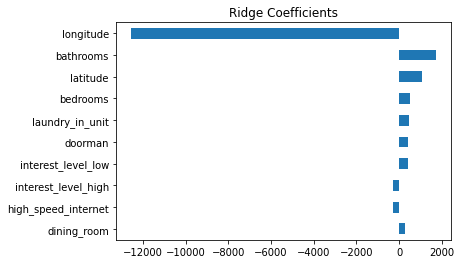

**Note:** Your figure shouldn't be identical to the one above. Your model will have different coefficients since it's been trained on different data. Only the formatting should be the same.

In [ ]:
# Assign the Coef from the lr model to a variable
coef_lr = model_lr.coef_

# Assign the features names from the ohe get feature names function to a variable
features = ohe.get_feature_names()

# Assign the importantance values from the features then sort them to see the highest to lowest realivance
feature_importance_lr = pd.Series(coef_lr,index=features).sort_values()

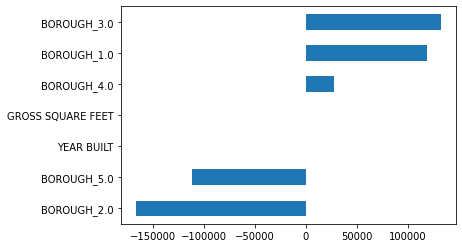

In [ ]:
# Plot the feature importance assigned above
feature_importance_lr.tail(10).plot(kind='barh');

# Linear Regression Model Top Features
* Borough 2
* Borough 3
* Borough 1

In [ ]:
# Assign the Coef from the ridge model to a variable
coef_r = model_r.coef_

# Assign the features names from the ohe get feature names function to a variable
features = ohe.get_feature_names()

# Assign the importantance values from the features then sort them to see the highest to lowest realivance
feature_importance_r = pd.Series(coef_r,index=features).sort_values()

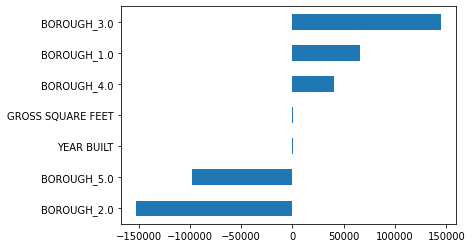

In [ ]:
# Plot the feature importance assigned above
feature_importance_r.tail(10).plot(kind='barh');

#Ridge Model Top Features
* Borough 2
* Borough 3
* Borough 5